# Análise de ETFs

O que é um ETF?
Um **ETF** (*Exchange-Traded Fund*), ou Fundo de Investimento em Exchange-Traded, é um tipo de fundo de investimento e produto negociado em bolsa de valores, com ações que são negociadas em bolsas de valores, semelhante a ações individuais. Os ETFs são projetados para acompanhar o desempenho de um índice específico, commodity, título ou um conjunto de ativos, e eles fornecem aos investidores exposição a uma carteira diversificada de ativos em um único investimento.

Aqui estão algumas características-chave dos ETFs:

1. **Diversificação**: Os ETFs normalmente mantêm uma carteira diversificada de ativos, que podem incluir ações, títulos, commodities ou outros instrumentos financeiros. Essa diversificação ajuda a espalhar o risco para os investidores.

2. **Liquidez**: Os ETFs são negociados em bolsas de valores ao longo do dia de negociação, assim como ações individuais. Isso fornece aos investidores liquidez, pois eles podem comprar ou vender ações de ETF a preços de mercado sempre que o mercado de ações estiver aberto.

3. **Transparência**: Os ETFs divulgam suas participações diariamente, permitindo que os investidores vejam exatamente quais ativos estão mantidos no fundo. Essa transparência pode ser útil para investidores que desejam entender a composição do fundo.

4. **Baixos Custos**: Os ETFs são conhecidos por terem taxas de despesas relativamente baixas em comparação com fundos mútuos. Isso pode torná-los uma opção atraente para investidores conscientes dos custos.

5. **Eficiência Fiscal**: Os ETFs são estruturados de uma maneira que pode ser eficiente do ponto de vista fiscal, pois podem ter menos distribuições de ganhos de capital em comparação com alguns fundos mútuos.

6. **Flexibilidade**: Os investidores podem usar ETFs para uma variedade de estratégias de investimento, incluindo investimento de longo prazo, negociação de curto prazo e proteção em uma carteira de investimentos.

7. **Desempenho de Mercado**: O valor de um ETF é baseado no desempenho dos ativos subjacentes que ele acompanha. Se o índice ou ativos subjacentes aumentarem de valor, o preço do ETF normalmente aumentará também.

Os ETFs se tornaram veículos de investimento populares para uma ampla gama de investidores, desde investidores individuais de varejo até investidores institucionais, devido à facilidade de acesso, aos benefícios de diversificação e à flexibilidade na construção de carteiras diversificadas. Eles são usados para vários fins, incluindo o acompanhamento do mercado de ações em geral, a obtenção de exposição a setores ou indústrias específicas e a gestão de riscos dentro de uma carteira de investimentos.


Lista de ETFs negociados no Brasil:
https://br.investing.com/etfs/brazil-etfs

## Bibliotecas

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import yfinance as yf
import requests

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

## Constantes

In [3]:
url = 'https://br.investing.com/etfs/brazil-etfs'

# Extração de dados

## Primeira tentativa
Usando o Beautiful Soup

In [4]:
soup = BeautifulSoup(url, 'html.parser')

c:\Python310\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [5]:
pd.read_html(str(soup))

HTTPError: HTTP Error 403: Forbidden

## Segunda Tentativa
Usando o método Requests

In [ ]:
requests.get(url)

<Response [403]>

Também retornou a resposta 403, Forbidden. No Google Collab retorna 200 a resposta, mas no VSCODE rodando diretamente na minha máquina e rede local retorna Forbidden, pode ser algum problema relacionado à permissão de rede (a máquina do Collab por rodar em um domínio do Google tem acessos diferentes à um provedor de rede local como o meu). Vamos seguir com outro método abaixo (Selenium).

## Terceira Tentativa
Usando o Chrome Web Driver / Selenium. Este método é mais complexo, mais demorado, porém além de ser o único que funcionou entre os 3, é o que tem maior versatilidade na busca por elementos dentro de uma página.

In [6]:
driver_path = 'C:/webdriver/chromedriver.exe'

chrome_options = Options()
chrome_options.add_argument('--headless')


driver = webdriver.Chrome(executable_path=driver_path, options=chrome_options)

url = 'https://br.investing.com/etfs/brazil-etfs' 
driver.get(url)

driver.save_screenshot('../Analisando ETFs/screenshots/screenshot.png')

table_id = 'etfs'
table = driver.find_element(By.ID, table_id)


table_html = table.get_attribute('outerHTML')
df = pd.read_html(table_html)[0] 

print(df)

driver.quit()


C:\Users\alan_\AppData\Local\Temp\ipykernel_4900\1996953450.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path, options=chrome_options)


     Unnamed: 0                                       Nome  Código   Último  \
0           NaN                       iShares Ibovespa ETF  BOVA11  11315.0   
1           NaN          iShares BM&FBOVESPA Small Cap ETF  SMAL11  10164.0   
2           NaN                        Trend ETF LBMA Ouro  GOLD11   9810.0   
3           NaN                        It Now Ibovespa ETF  BOVV11  11855.0   
4           NaN                        iShares S&P 500 ETF  IVVB11  23879.0   
..          ...                                        ...     ...      ...   
224         NaN               Xtrackers MSCI USA UCITS BDR  BEUA39      NaN   
225         NaN            Xtrackers MSCI Europe UCITS BDR  BEUR39      NaN   
226         NaN  Xtrackers MSCI Emerging Markets UCITS BDR  BEME39      NaN   
227         NaN  ETF Investo Teva Tesouro IPCA+ 0 a 4 Anos  NTNS11      NaN   
228         NaN             Xtrackers MSCI China UCITS BDR  BCHA39      NaN   

       Var%     Vol.   Hora  Unnamed: 7  
0    +0,8

In [7]:
df.head()

,Unnamed: 0,Nome,Código,Último,Var%,Vol.,Hora,Unnamed: 7
0,NaN,iShares Ibovespa ETF,BOVA11,11315.0,"+0,86%","4,24M",29/09,NaN
1,NaN,iShares BM&FBOVESPA Small Cap ETF,SMAL11,10164.0,"+0,48%","4,19M",29/09,NaN
2,NaN,Trend ETF LBMA Ouro,GOLD11,9810.0,"-1,21%","1,27M",29/09,NaN
3,NaN,It Now Ibovespa ETF,BOVV11,11855.0,"+0,71%","992,12K",29/09,NaN
4,NaN,iShares S&P 500 ETF,IVVB11,23879.0,"-0,29%","434,35K",29/09,NaN


In [8]:
df = df.iloc[:,1:7]

In [9]:
df.head()

,Nome,Código,Último,Var%,Vol.,Hora
0,iShares Ibovespa ETF,BOVA11,11315.0,"+0,86%","4,24M",29/09
1,iShares BM&FBOVESPA Small Cap ETF,SMAL11,10164.0,"+0,48%","4,19M",29/09
2,Trend ETF LBMA Ouro,GOLD11,9810.0,"-1,21%","1,27M",29/09
3,It Now Ibovespa ETF,BOVV11,11855.0,"+0,71%","992,12K",29/09
4,iShares S&P 500 ETF,IVVB11,23879.0,"-0,29%","434,35K",29/09


In [10]:
etfs = df

In [11]:
list(etfs['Código'])

['BOVA11',
 'SMAL11',
 'GOLD11',
 'BOVV11',
 'IVVB11',
 'NASD11',
 'HASH11',
 'BOVX11',
 'UTEC11',
 'USAL11',
 'PIBB11',
 'XINA11',
 'QBTC11',
 'LFTS11',
 'BIVB39',
 'QDFI11',
 'SPXI11',
 'ABGD39',
 'QETH11',
 'FIND11',
 'URET11',
 'ESGD11',
 'BTLT39',
 'BEWH39',
 'ESGU11',
 'BITH11',
 'DIVO11',
 'BBOV11',
 'IMAB11',
 'B5P211',
 'BIYW39',
 'BIHI39',
 'BIAU39',
 'BSLV39',
 'BIYE39',
 'SMAC11',
 'ETHE11',
 'TRIG11',
 'ACWI11',
 'ALUG11',
 'BBOI11',
 'ESGE11',
 'EURP11',
 'CORN11',
 'SHOT11',
 'GENB11',
 'BEEM39',
 'XFIX11',
 'WRLD11',
 'DNAI11',
 'TECK11',
 'BEWG39',
 'BURA39',
 'DEFI11',
 'MATB11',
 'BIWF39',
 'BOVB11',
 'CRPT11',
 'BITI11',
 'BEFV39',
 'BDVY39',
 'TECB11',
 'BEZU39',
 'USTK11',
 'SPXB11',
 'BIVE39',
 'BEMV39',
 'BSHY39',
 'BIEU39',
 'BIBB39',
 'WEB311',
 'BUSM39',
 'BIJH39',
 'IB5M11.',
 'BEGU39',
 'ISUS11',
 'USDB11',
 'BSHV39',
 'BRAX11',
 'BIYT39',
 'BLQD39',
 'BFAV39',
 'ELAS11',
 'BOVS11',
 'BIWM39',
 'BIJR39',
 'FIXA11',
 'BGWH39',
 'BSOX39',
 'GOVE11',
 'BGOV39'

# Extraindo os dados de cotações dos ETFs

In [12]:
etfs = yf.download([i + '.SA' for i in list(etfs['Código'])],start = '2023-01-01')['Close']

[*********************100%***********************]  229 of 229 completed

16 Failed downloads:
- BWOR39.SA: No data found, symbol may be delisted
- BEME39.SA: No data found, symbol may be delisted
- BEUR39.SA: No data found, symbol may be delisted
- BSNS39.SA: No data found, symbol may be delisted
- BJAP39.SA: No data found, symbol may be delisted
- IB5M11..SA: No data found, symbol may be delisted
- BFTS39.SA: No data found, symbol may be delisted
- BTWO39.SA: No data found, symbol may be delisted
- SLXB39.SA: No data found, symbol may be delisted
- BEQW39.SA: No data found, symbol may be delisted
- BEUA39.SA: No data found, symbol may be delisted
- BUFF39.SA: No data found, symbol may be delisted
- BPFV39.SA: No data found, symbol may be delisted
- BLUZ39.SA: No data found, symbol may be delisted
- BMIL39.SA: No data found, symbol may be delisted
- BCHA39.SA: No data found, symbol may be delisted


In [13]:
etfs.head()

,5GTK11.SA,ABGD39.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAAX39.SA,BACW39.SA,BAER39.SA,BBOI11.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,74.500000,NaN,9.34,44.400002,35.299999,76.760002,NaN,NaN,29.459999,NaN,...,8.54,95.019997,7.65,10.14,10.79,83.120003,105.570000,10.07,6.36,39.810001
2023-01-03 00:00:00,77.050003,NaN,9.53,43.000000,35.750000,76.660004,NaN,NaN,29.459999,NaN,...,8.67,97.790001,7.87,10.24,11.73,82.400002,102.459999,10.03,6.63,39.500000
2023-01-04 00:00:00,77.800003,NaN,9.59,43.639999,36.500000,76.589996,NaN,NaN,30.379999,NaN,...,8.69,97.750000,7.75,10.22,12.05,82.900002,103.580002,10.05,7.00,41.570000
2023-01-05 00:00:00,75.550003,NaN,9.36,44.090000,35.000000,76.629997,NaN,NaN,29.930000,NaN,...,8.46,96.620003,7.61,9.87,11.10,80.849998,105.800003,10.06,6.89,40.330002
2023-01-06 00:00:00,76.099998,NaN,9.36,44.290001,35.099998,76.830002,NaN,NaN,29.930000,NaN,...,8.44,94.970001,7.60,9.91,11.36,80.750000,107.059998,10.05,6.78,40.810001


Limpando os dados

In [14]:
etfs.dropna(axis = 1)

,5GTK11.SA,ACWI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,BCHQ39.SA,...,URET11.SA,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,74.500000,9.34,35.299999,76.760002,29.459999,54.799999,87.699997,36.650002,31.400000,27.290001,...,8.69,8.54,95.019997,7.65,10.14,10.79,83.120003,105.570000,10.07,6.36
2023-01-03,77.050003,9.53,35.750000,76.660004,29.459999,53.770000,85.849998,36.650002,33.400002,28.500000,...,8.83,8.67,97.790001,7.87,10.24,11.73,82.400002,102.459999,10.03,6.63
2023-01-04,77.800003,9.59,36.500000,76.589996,30.379999,54.480000,86.879997,36.650002,35.160000,30.299999,...,8.97,8.69,97.750000,7.75,10.22,12.05,82.900002,103.580002,10.05,7.00
2023-01-05,75.550003,9.36,35.000000,76.629997,29.930000,55.689999,87.699997,36.650002,34.910000,30.209999,...,8.59,8.46,96.620003,7.61,9.87,11.10,80.849998,105.800003,10.06,6.89
2023-01-06,76.099998,9.36,35.099998,76.830002,29.930000,56.080002,88.239998,36.650002,34.279999,29.370001,...,8.61,8.44,94.970001,7.60,9.91,11.36,80.750000,107.059998,10.05,6.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,72.180000,9.46,30.459999,83.550003,30.350000,59.060001,97.050003,39.689999,26.820000,22.230000,...,7.84,8.91,86.489998,9.21,12.07,10.99,81.540001,112.059998,11.36,5.32
2023-09-27,73.400002,9.58,30.600000,83.449997,27.000000,59.119999,96.580002,39.689999,27.090000,22.230000,...,7.82,9.06,87.169998,9.34,12.26,10.89,82.699997,112.180000,11.35,5.39
2023-09-28,74.290001,9.62,30.559999,83.480003,26.639999,59.849998,97.760002,39.689999,26.969999,22.230000,...,7.89,9.10,87.400002,9.37,12.35,11.05,82.870003,113.540001,11.34,5.37


Forma mais refinada de limpar missings. Através de um Data Quality com base em um treshold (vamos usar 90% neste caso)

In [15]:
etfs.isna().sum()

5GTK11.SA      0
ABGD39.SA    187
ACWI11.SA      0
AGRI11.SA      2
ALUG11.SA      0
            ... 
WRLD11.SA      0
XBOV11.SA      0
XFIX11.SA      0
XINA11.SA      0
YDRO11.SA      1
Length: 229, dtype: int64

In [16]:
etfs.shape[0]

188

In [17]:
etfs.isna().sum()/etfs.shape[0]

5GTK11.SA    0.000000
ABGD39.SA    0.994681
ACWI11.SA    0.000000
AGRI11.SA    0.010638
ALUG11.SA    0.000000
               ...   
WRLD11.SA    0.000000
XBOV11.SA    0.000000
XFIX11.SA    0.000000
XINA11.SA    0.000000
YDRO11.SA    0.005319
Length: 229, dtype: float64

In [18]:
fg_etfs_integros = etfs.isna().sum()/etfs.shape[0] < 0.9

In [19]:
etfs.columns[fg_etfs_integros]

Index(['5GTK11.SA', 'ACWI11.SA', 'AGRI11.SA', 'ALUG11.SA', 'B5P211.SA',
       'BAER39.SA', 'BBOV11.SA', 'BBSD11.SA', 'BBUG39.SA', 'BCHI39.SA',
       ...
       'USAL11.SA', 'USDB11.SA', 'USTK11.SA', 'UTEC11.SA', 'WEB311.SA',
       'WRLD11.SA', 'XBOV11.SA', 'XFIX11.SA', 'XINA11.SA', 'YDRO11.SA'],
      dtype='object', length=148)

In [20]:
etfs_filtrados = etfs[etfs.columns[fg_etfs_integros]]

In [21]:
etfs_filtrados.head()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,74.500000,9.34,44.400002,35.299999,76.760002,29.459999,54.799999,87.699997,36.650002,31.400000,...,8.54,95.019997,7.65,10.14,10.79,83.120003,105.570000,10.07,6.36,39.810001
2023-01-03 00:00:00,77.050003,9.53,43.000000,35.750000,76.660004,29.459999,53.770000,85.849998,36.650002,33.400002,...,8.67,97.790001,7.87,10.24,11.73,82.400002,102.459999,10.03,6.63,39.500000
2023-01-04 00:00:00,77.800003,9.59,43.639999,36.500000,76.589996,30.379999,54.480000,86.879997,36.650002,35.160000,...,8.69,97.750000,7.75,10.22,12.05,82.900002,103.580002,10.05,7.00,41.570000
2023-01-05 00:00:00,75.550003,9.36,44.090000,35.000000,76.629997,29.930000,55.689999,87.699997,36.650002,34.910000,...,8.46,96.620003,7.61,9.87,11.10,80.849998,105.800003,10.06,6.89,40.330002
2023-01-06 00:00:00,76.099998,9.36,44.290001,35.099998,76.830002,29.930000,56.080002,88.239998,36.650002,34.279999,...,8.44,94.970001,7.60,9.91,11.36,80.750000,107.059998,10.05,6.78,40.810001


Preencher os missings. Usar o foward filling, projetando com um dado do passado um dado futuro para reduzir viéses 

In [22]:
etfs_filtrados_semmissing = etfs_filtrados.ffill(axis = 0)

In [23]:
etfs_filtrados_semmissing.head()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,74.500000,9.34,44.400002,35.299999,76.760002,29.459999,54.799999,87.699997,36.650002,31.400000,...,8.54,95.019997,7.65,10.14,10.79,83.120003,105.570000,10.07,6.36,39.810001
2023-01-03 00:00:00,77.050003,9.53,43.000000,35.750000,76.660004,29.459999,53.770000,85.849998,36.650002,33.400002,...,8.67,97.790001,7.87,10.24,11.73,82.400002,102.459999,10.03,6.63,39.500000
2023-01-04 00:00:00,77.800003,9.59,43.639999,36.500000,76.589996,30.379999,54.480000,86.879997,36.650002,35.160000,...,8.69,97.750000,7.75,10.22,12.05,82.900002,103.580002,10.05,7.00,41.570000
2023-01-05 00:00:00,75.550003,9.36,44.090000,35.000000,76.629997,29.930000,55.689999,87.699997,36.650002,34.910000,...,8.46,96.620003,7.61,9.87,11.10,80.849998,105.800003,10.06,6.89,40.330002
2023-01-06 00:00:00,76.099998,9.36,44.290001,35.099998,76.830002,29.930000,56.080002,88.239998,36.650002,34.279999,...,8.44,94.970001,7.60,9.91,11.36,80.750000,107.059998,10.05,6.78,40.810001


In [24]:
etfs_filtrados_semmissing.isna().sum().sum()

4

Limpando a primeira linha

In [25]:
etfs_filtrados_semmissing_v2 = etfs_filtrados.ffill(axis = 0)

In [26]:
etfs_filtrados_semmissing_v2 = etfs_filtrados_semmissing_v2.drop(etfs_filtrados_semmissing_v2.index[0])

In [27]:
etfs_filtrados_semmissing_v2.isna().sum().sum()

0

Note que agora a quantidade de NaN é 0 agora!!!

# Análises de desempenho

## Normaliznado os dados

In [28]:
etfs_norm = etfs_filtrados_semmissing_v2/etfs_filtrados_semmissing_v2.iloc[0]

In [29]:
etfs_norm.head()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-01-04 00:00:00,1.009734,1.006296,1.014884,1.020979,0.999087,1.031229,1.013204,1.011998,1.0,1.052695,...,1.002307,0.999591,0.984752,0.998047,1.027281,1.006068,1.010931,1.001994,1.055807,1.052405
2023-01-05 00:00:00,0.980532,0.982162,1.025349,0.979021,0.999609,1.015954,1.035708,1.021549,1.0,1.045210,...,0.975779,0.988036,0.966963,0.963867,0.946292,0.981189,1.032598,1.002991,1.039216,1.021013
2023-01-06 00:00:00,0.987670,0.982162,1.030000,0.981818,1.002218,1.015954,1.042961,1.027839,1.0,1.026347,...,0.973472,0.971163,0.965693,0.967773,0.968457,0.979976,1.044896,1.001994,1.022624,1.033165
2023-01-09 00:00:00,1.001947,0.989507,1.035349,0.986294,1.003652,1.015954,1.048354,1.036925,1.0,1.028443,...,0.980392,0.979343,0.984752,0.985352,1.040068,0.987864,1.046067,0.997009,1.031674,1.063544


In [30]:
etfs_norm.iloc[-1].sort_values(ascending = False).head(10)

META11.SA    1.369573
QDFI11.SA    1.307393
DEFI11.SA    1.239899
BKYY39.SA    1.239286
BIWF39.SA    1.216474
BIXN39.SA    1.203242
NFTS11.SA    1.169470
QBTC11.SA    1.158470
HASH11.SA    1.158228
TECK11.SA    1.150350
Name: 2023-03-10 00:00:00, dtype: float64

In [31]:
top10_etfs = list(etfs_norm.iloc[-1].sort_values(ascending = False).head(10).index)

In [32]:
top10_etfs_df = yf.download(top10_etfs, start='2023-01-01')['Close']

[**********************60%****                   ]  6 of 10 completed

[*********************100%***********************]  10 of 10 completed


In [33]:
top10_etfs_df_norm = top10_etfs_df/top10_etfs_df.iloc[0]

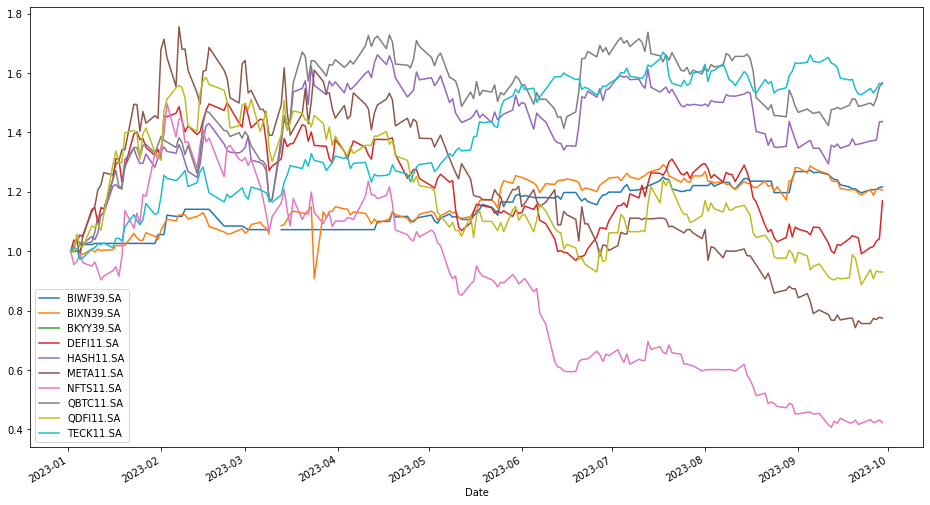

In [34]:
top10_etfs_df_norm.plot(figsize = (16,9));

In [35]:
etfs_norm[top10_etfs]

,META11.SA,QDFI11.SA,DEFI11.SA,BKYY39.SA,BIWF39.SA,BIXN39.SA,NFTS11.SA,QBTC11.SA,HASH11.SA,TECK11.SA
Date,,,,,,,,,,
2023-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-01-04,1.024915,1.062257,0.993056,1.000000,1.000000,1.000000,1.009346,1.021858,1.027848,0.994278
2023-01-05,0.963005,1.019455,1.016414,1.000000,1.000000,0.987531,1.039875,1.014572,1.009494,0.959949
2023-01-06,1.037750,1.019455,1.010101,1.000000,1.022691,0.987531,1.006231,1.009108,1.012658,0.965035
2023-01-09,1.116270,1.089494,1.099116,1.000000,1.022691,1.003741,0.994393,1.016393,1.035443,0.994596
...,...,...,...,...,...,...,...,...,...,...
2023-09-26,0.762174,0.910506,0.978535,1.199351,1.207170,1.185785,0.443614,1.468124,1.354430,1.513032
2023-09-27,0.758777,0.937743,0.996843,1.218182,1.208305,1.205736,0.446106,1.491803,1.356329,1.527019
2023-09-28,0.766327,0.933852,1.003788,1.218182,1.214885,1.205736,0.452336,1.530055,1.416456,1.544819


## Quais são os ETFs mais negociados no Brasil, na média? (analise de liquidez)

In [36]:
etfs_norm.columns

Index(['5GTK11.SA', 'ACWI11.SA', 'AGRI11.SA', 'ALUG11.SA', 'B5P211.SA',
       'BAER39.SA', 'BBOV11.SA', 'BBSD11.SA', 'BBUG39.SA', 'BCHI39.SA',
       ...
       'USAL11.SA', 'USDB11.SA', 'USTK11.SA', 'UTEC11.SA', 'WEB311.SA',
       'WRLD11.SA', 'XBOV11.SA', 'XFIX11.SA', 'XINA11.SA', 'YDRO11.SA'],
      dtype='object', length=148)

In [37]:
volumes = yf.download(list(etfs_norm.columns), start = '2023-01-01')['Volume']

[*********************100%***********************]  148 of 148 completed


Limpando os dados faltantes

In [38]:
volumes.isna().sum().sum()

284

In [39]:
volumes_fill_nan = volumes.ffill(axis = 0)

In [40]:
volumes_fill_nan.isna().sum().sum()

4

In [41]:
volumes_fill_nan = volumes_fill_nan.drop(volumes_fill_nan.index[0])

In [42]:
volumes_fill_nan.isna().sum().sum()

0

Media dos volumes (média pode ser enviesada, testar outros métodos depois)

In [43]:
volumes_fill_nan.mean().sort_values(ascending = False)

BOVA11.SA    6.877043e+06
SMAL11.SA    2.329181e+06
BOVV11.SA    1.648690e+06
GOLD11.SA    1.136607e+06
BOVX11.SA    9.631152e+05
                 ...     
BICL39.SA    8.352941e+00
BIYG39.SA    4.967914e+00
BSIZ39.SA    2.465241e+00
BHEF39.SA    1.556150e+00
BIXG39.SA    9.572193e-01
Length: 148, dtype: float64

In [44]:
top10_etfs_volumes = list(volumes_fill_nan.mean().sort_values(ascending = False).head(10).index)

In [45]:
#lista com top 10 etfs por valorização
top10_etfs
#lista com top 10 etfs por volume
top10_etfs_volumes

['BOVA11.SA',
 'SMAL11.SA',
 'BOVV11.SA',
 'GOLD11.SA',
 'BOVX11.SA',
 'NASD11.SA',
 'XINA11.SA',
 'IVVB11.SA',
 'HASH11.SA',
 'USAL11.SA']

In [46]:
volumes_top_10_etfs = volumes[top10_etfs_volumes]

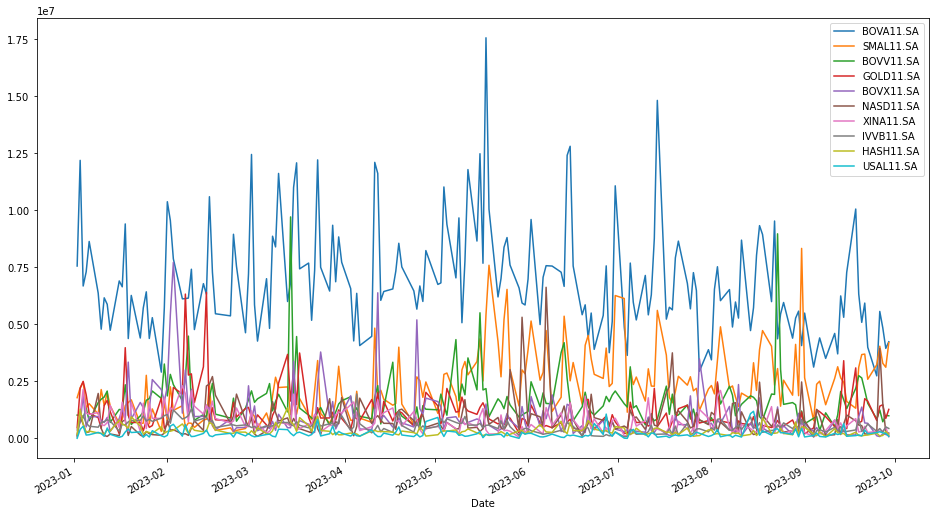

In [47]:
volumes_top_10_etfs.plot(figsize = (16,9));

In [48]:
volumes_top_10_etfs_norm =  volumes_top_10_etfs/volumes_top_10_etfs.iloc[0]

In [49]:
volumes_top_10_etfs_norm.head()

,BOVA11.SA,SMAL11.SA,BOVV11.SA,GOLD11.SA,BOVX11.SA,NASD11.SA,XINA11.SA,IVVB11.SA,HASH11.SA,USAL11.SA
Date,,,,,,,,,,
2023-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-01-03,1.613096,1.243259,0.996785,4.744157,1.889012,13.248984,7.028225,6.473023,7.534894,108.525485
2023-01-04,0.884049,1.389621,0.880973,5.404447,5.113931,9.123534,14.372758,7.696318,3.648992,147.111911
2023-01-05,0.966296,0.753564,1.296176,4.139692,1.370730,3.657829,7.426369,5.155189,1.544309,40.436011
2023-01-06,1.142537,0.852590,0.761004,2.371737,2.550276,4.112871,7.006360,4.095002,1.883174,44.060388


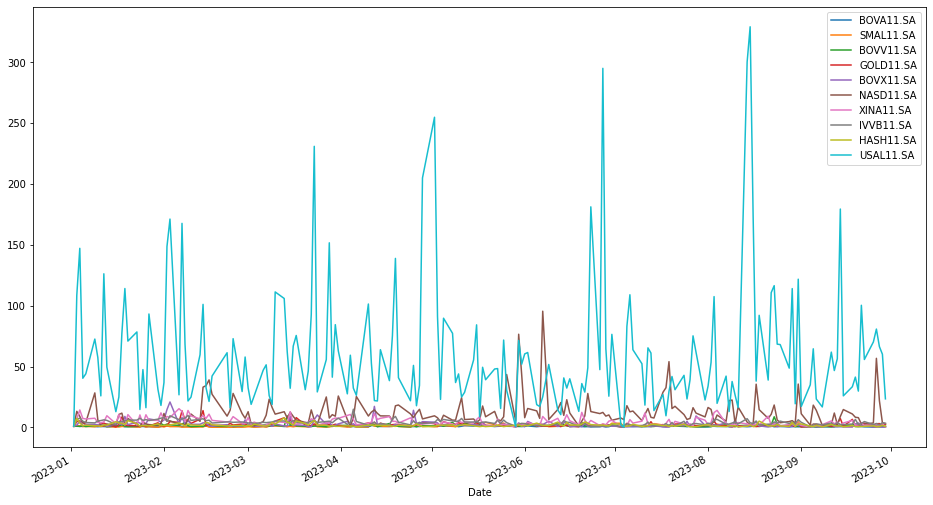

In [50]:
volumes_top_10_etfs_norm.plot(figsize = (16,9));

Há uma distorção pelo volume de negociação do USAL11, o que isso representa?

In [55]:
volumes['USAL11.SA'].head()

Date
2023-01-02      3610
2023-01-03    391777
2023-01-04    531074
2023-01-05    145974
2023-01-06    159058
Name: USAL11.SA, dtype: int64

Apesar de atípico o baixo volume, foi constatado que realmente o ETF teve baixa negociação neste dia na bolsa em fontes distintas. Há dias próximo de feriados em que os volumes de negociações são pequenos, por isso é importante tomar cuidado com a utilização de volume negociado, e a variação deste indicador dia a dia (mesmo que normalizado, como é este caso). Ainda é possível que exista um viés nos dados

In [51]:
desempenhos_top10_etfs_volumes = etfs_norm[top10_etfs_volumes]

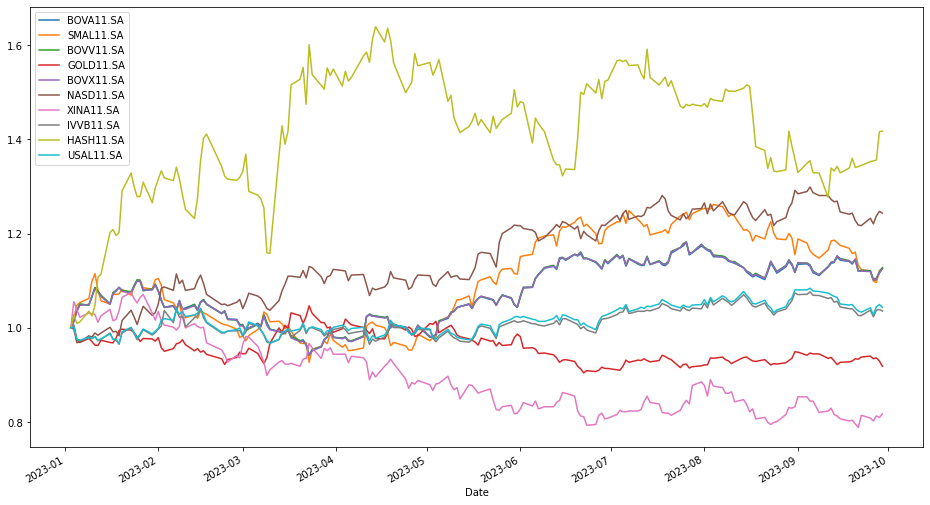

In [52]:
desempenhos_top10_etfs_volumes.plot(figsize=(16,9));

#### TODO: simular uma carteira com ETFs e outros ativos e fazer o backtest com a vectorbt, tentar ver o nível de risco da carteira com e sem ETFs